<a href="https://colab.research.google.com/github/DNKFI/Adaptive-UAV-Communication/blob/main/FSO_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
%%capture
!pip install pycaret

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.regression import *
import pycaret.regression as pycr

In [156]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.drop('S. No.', axis=1)
test = test.drop('S. No.', axis=1)
train

,Pressure (hPa),Height (m),Temp (K),Temp Gradient,Windshear,Cn^2
0,247,11123,235.05,-0.010,0.0000,20.0
1,1000,26,302.55,0.014,1.0956,14.0
2,809,1918,298.05,0.005,0.4320,15.0
3,185,13070,222.35,-0.009,0.0000,19.0
4,250,11090,237.45,-0.006,0.1080,17.0
...,...,...,...,...,...,...
994,870,1301,305.75,-0.007,0.0309,17.0
995,850,1509,303.75,-0.010,0.0000,19.0
996,798,2058,298.65,-0.009,0.0309,18.0
997,724,2905,290.75,-0.009,0.2622,18.0


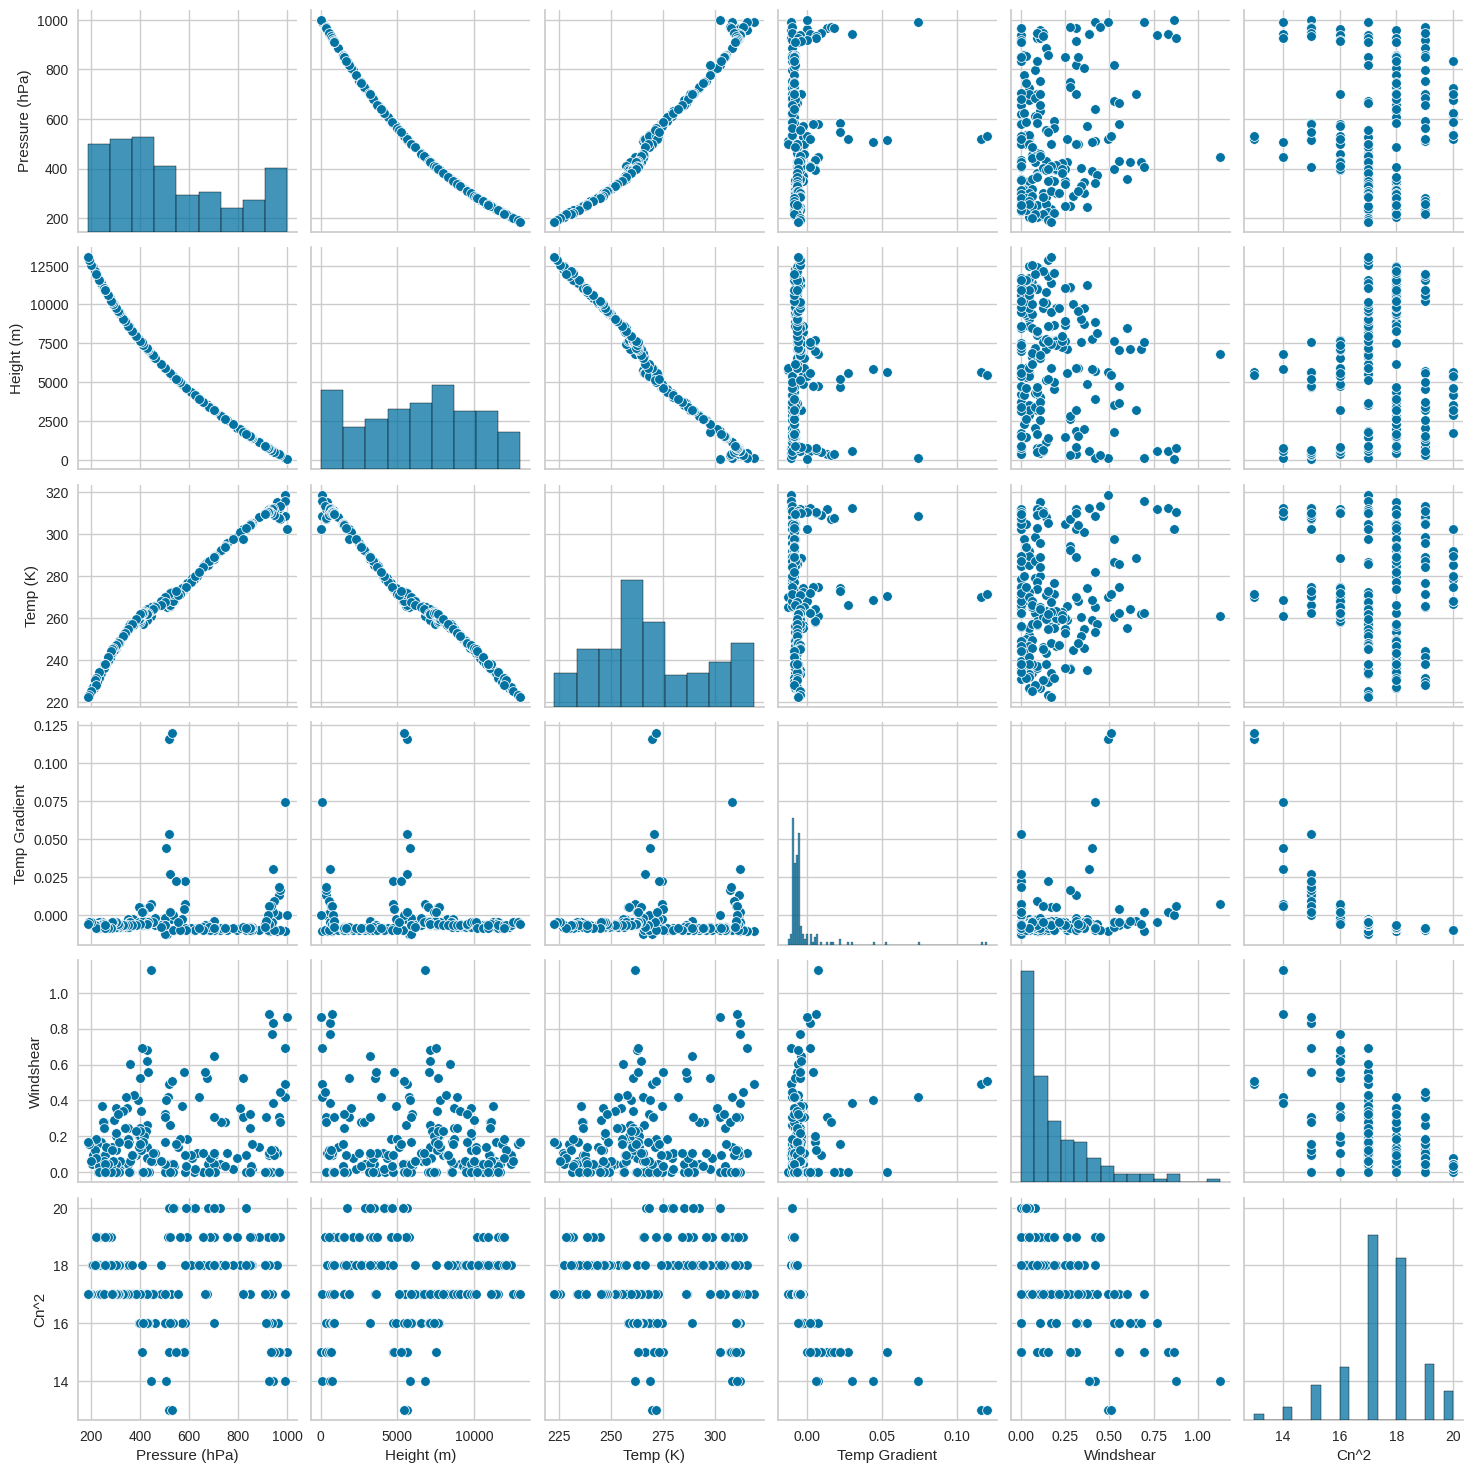

In [157]:
# prompt: Using dataframe test: 2D for all inputs

import matplotlib.pyplot as plt
import seaborn as sns

# Create a pairplot to visualize relationships between all numerical variables
sns.pairplot(test)
plt.savefig('Original_data.eps', format='eps')
# Display the plot
plt.show()


In [158]:
input_data=train.iloc[:,:-1]
column_stds = np.std(input_data, axis=0)

# Set the noise level as a fraction of the column's standard deviation
noise_level = 0.1 # Adjust this factor based on desired noise intensity

# Generate noise for each column, scaled by the column's standard deviation
noise = np.random.normal(loc=0.0, scale=column_stds * noise_level, size=input_data.shape)
#Generate a random DataFrame with entries of 0 and 1
df_random = np.random.randint(0, 2, size=input_data.shape)
# Add the noise to the original data
perturbed_train = input_data + noise * df_random
train.iloc[:,:-1]=perturbed_train

In [159]:
10*np.log10(np.var(input_data, axis=0)/np.var(noise, axis=0))

,0
Pressure (hPa),20.289247
Height (m),20.440071
Temp (K),20.163337
Temp Gradient,20.208656
Windshear,19.914479


In [160]:
input_data=test.iloc[:,:-1]
column_stds = np.std(input_data, axis=0)

# Generate noise for each column, scaled by the column's standard deviation
noise = np.random.normal(loc=0.0, scale=column_stds * noise_level, size=input_data.shape)
#Generate a random DataFrame with entries of 0 and 1
df_random = np.random.randint(0, 2, size=input_data.shape)
# Add the noise to the original data
perturbed_test = input_data + noise * df_random
test.iloc[:,:-1]=perturbed_test
test

,Pressure (hPa),Height (m),Temp (K),Temp Gradient,Windshear,Cn^2
0,690.575174,3107.362192,284.696387,-0.004000,0.648000,16.0
1,674.000000,3515.000000,286.550000,-0.008551,0.524700,17.0
2,665.000000,3627.000000,282.803405,-0.008090,0.555600,17.0
3,657.000000,3729.000000,284.950000,-0.010520,0.000000,18.0
4,445.000000,6824.000000,261.250000,0.007325,1.126500,14.0
...,...,...,...,...,...,...
198,244.535610,10161.000000,245.250000,-0.005000,0.129180,17.0
199,282.000000,10347.197303,244.550000,-0.006788,0.000000,19.0
200,269.825008,10598.000000,241.350000,-0.009000,0.050729,19.0
201,256.000000,11496.716392,232.796544,-0.009000,0.054786,19.0


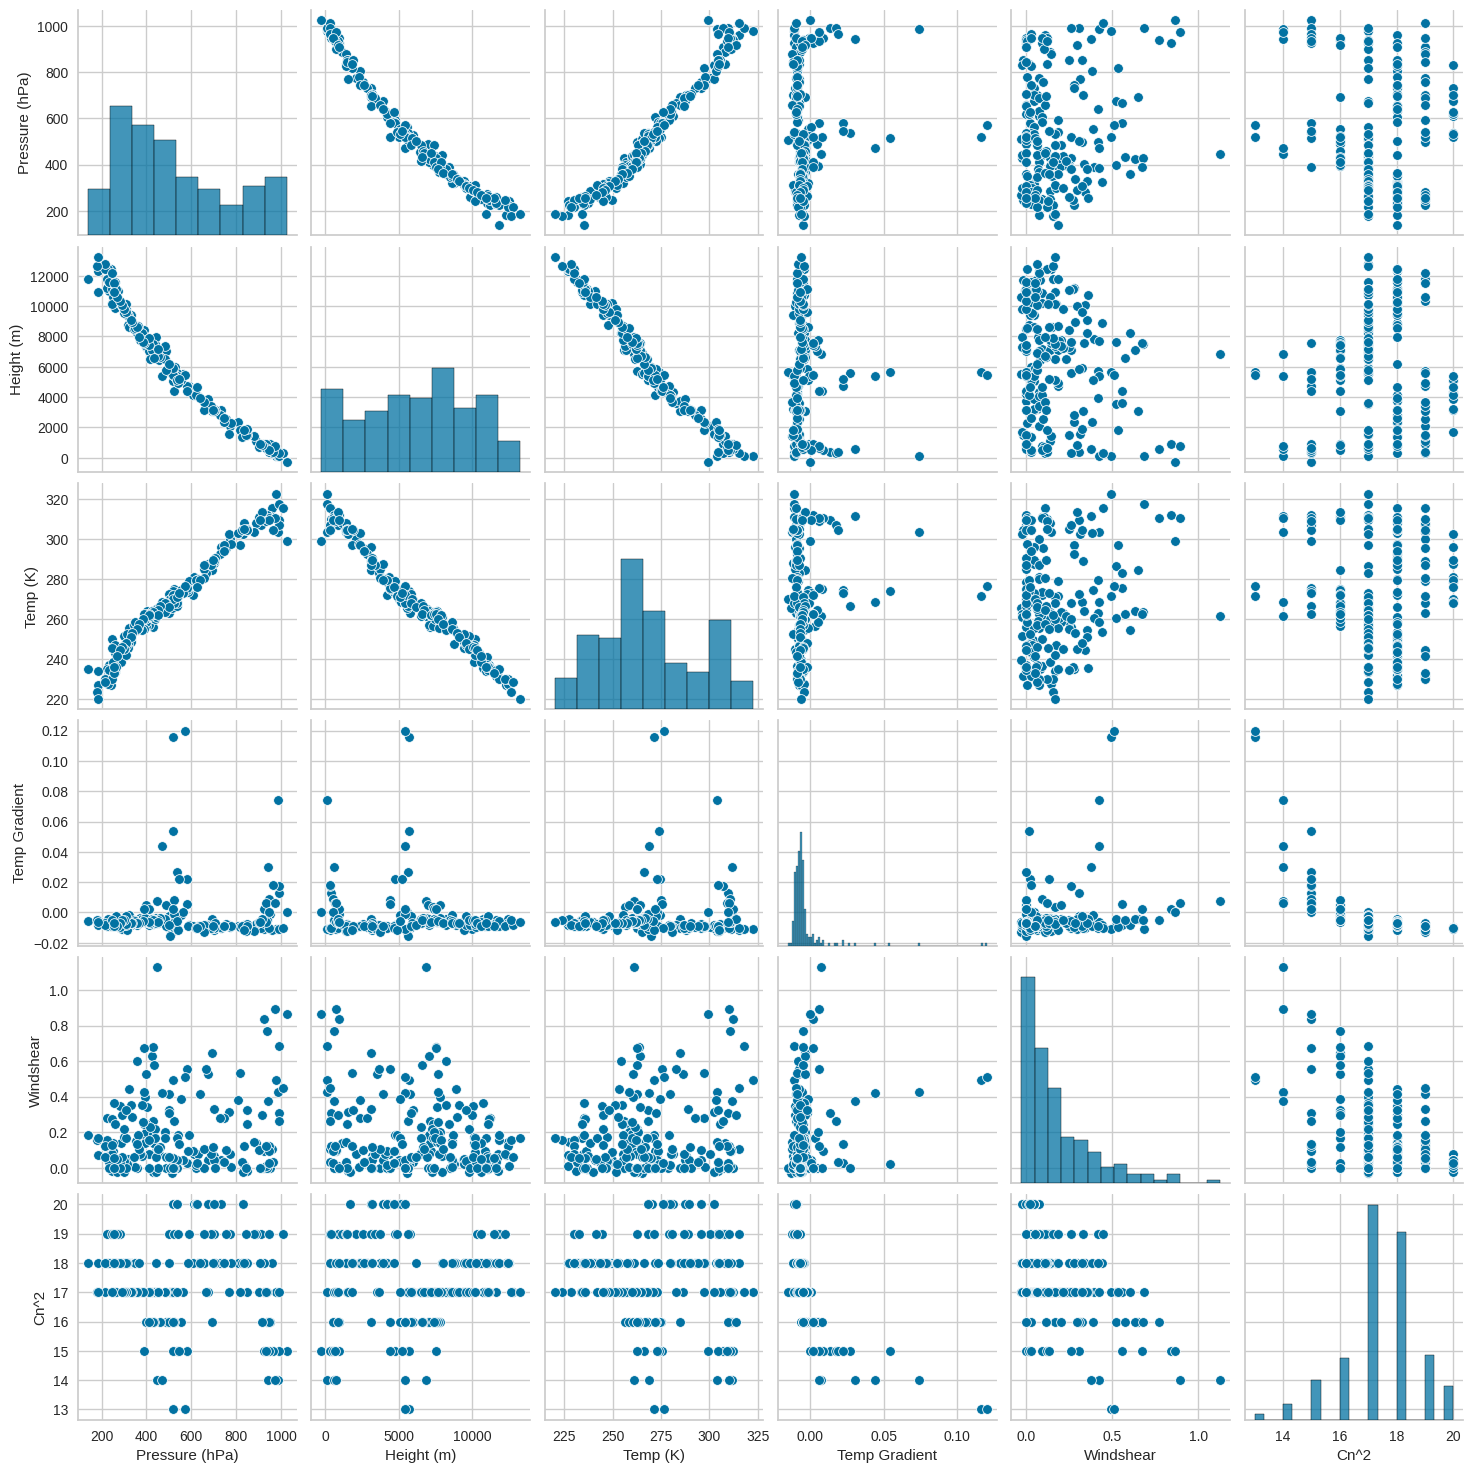

In [161]:
# prompt: Using dataframe test: 2D for all inputs

import matplotlib.pyplot as plt
import seaborn as sns

# Create a pairplot to visualize relationships between all numerical variables
sns.pairplot(test)
plt.savefig('Noisy_data.eps', format='eps')
# Display the plot
plt.show()


In [162]:
# train[train.columns[-1]]=train[train.columns[-1]]/1e-15
# test[test.columns[-1]]=test[test.columns[-1]]/1e-15


# test

In [163]:
s = setup(train, target = 'Cn^2',fold=5, session_id=246)

,Description,Value
0,Session id,246
1,Target,Cn^2
2,Target type,Regression
3,Original data shape,"(999, 6)"
4,Transformed data shape,"(999, 6)"
5,Transformed train set shape,"(699, 6)"
6,Transformed test set shape,"(300, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [164]:
# best_model = compare_models(fold=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.3962,0.2858,0.5342,0.8623,0.0304,0.0235,0.1667
et,Extra Trees Regressor,0.3720,0.2994,0.5471,0.8553,0.0306,0.0219,0.1867
rf,Random Forest Regressor,0.3733,0.3082,0.5546,0.8515,0.0317,0.0222,0.3333
xgboost,Extreme Gradient Boosting,0.4073,0.3378,0.5807,0.8373,0.0334,0.0241,0.1400
ada,AdaBoost Regressor,0.5161,0.4409,0.6634,0.7867,0.0391,0.0313,0.1567
lightgbm,Light Gradient Boosting Machine,0.4629,0.4559,0.6749,0.7800,0.0414,0.0282,0.6033
dt,Decision Tree Regressor,0.4192,0.5937,0.7700,0.7139,0.0442,0.0249,0.0500
br,Bayesian Ridge,0.7031,0.8589,0.9241,0.5824,0.0552,0.0423,0.0467
lr,Linear Regression,0.7019,0.8638,0.9265,0.5801,0.0558,0.0423,1.7633
lar,Least Angle Regression,0.7074,0.8761,0.9334,0.5741,0.0561,0.0426,0.0267


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [165]:
et = pycr.create_model('et')
lightgbm = pycr.create_model('lightgbm')
gbr = pycr.create_model('gbr')
# et = pycr.create_model('knn')
# lightgbm = pycr.create_model('lr')
# gbr = pycr.create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3336,0.2692,0.5189,0.8803,0.0290,0.0196
1,0.3579,0.2820,0.5311,0.8541,0.0287,0.0207
2,0.3456,0.2728,0.5223,0.8701,0.0285,0.0201
3,0.3544,0.2902,0.5387,0.8896,0.0326,0.0219
4,0.3780,0.2998,0.5476,0.7876,0.0293,0.0216
Mean,0.3539,0.2828,0.5317,0.8563,0.0296,0.0208
Std,0.0147,0.0112,0.0105,0.0364,0.0015,0.0008


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4693,0.4743,0.6887,0.7892,0.0428,0.0287
1,0.4298,0.3779,0.6147,0.8045,0.0352,0.0255
2,0.4408,0.4289,0.6549,0.7957,0.0399,0.0267
3,0.4455,0.4856,0.6969,0.8153,0.0494,0.0294
4,0.4122,0.3479,0.5899,0.7535,0.0332,0.0241
Mean,0.4395,0.4229,0.6490,0.7916,0.0401,0.0269
Std,0.0188,0.0534,0.0414,0.0210,0.0058,0.0020


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3813,0.2632,0.5130,0.8830,0.0279,0.0223
1,0.4107,0.2987,0.5465,0.8455,0.0305,0.0241
2,0.3775,0.2524,0.5023,0.8798,0.0277,0.0221
3,0.3629,0.2447,0.4947,0.9069,0.0309,0.0225
4,0.4032,0.3075,0.5546,0.7821,0.0300,0.0233
Mean,0.3871,0.2733,0.5222,0.8595,0.0294,0.0229
Std,0.0175,0.0252,0.0240,0.0434,0.0013,0.0008


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [166]:
# et = tune_model(et)
# lightgbm = tune_model(lightgbm)
# gbr = tune_model(gbr)

In [167]:
et = finalize_model(et)
lightgbm = finalize_model(lightgbm)
gbr = finalize_model(gbr)

In [168]:
predictions_et = predict_model(et, data=test)
predictions_gbr = predict_model(gbr, data=test)
predictions_lightgbm = predict_model(lightgbm, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.3375,0.2745,0.5239,0.8498,0.0281,0.0193


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.3709,0.2517,0.5017,0.8623,0.0268,0.0212


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3758,0.2913,0.5397,0.8406,0.0296,0.0218


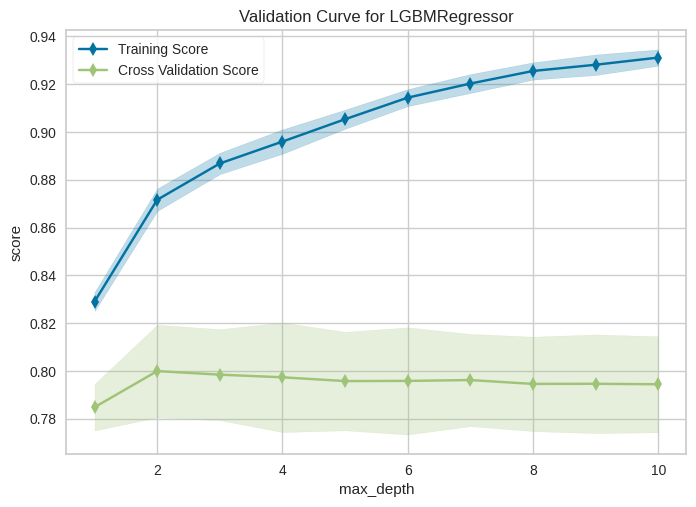

In [169]:
evaluate_model(lightgbm)

In [170]:
plot_model(lightgbm, plot = 'feature', save=True)
# plt.savefig('feature_importance.png', format='png')

'Feature Importance.png'

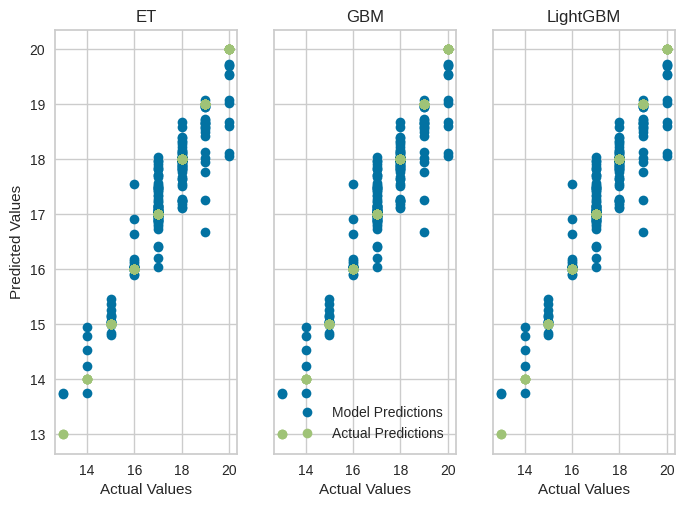

In [171]:
fig, axs = plt.subplots(1, 3)

x = predictions_et[predictions_et.columns[-2]]
y = predictions_et[predictions_et.columns[-1]]
axs[0].plot(x, y, 'o')
axs[0].plot(x, x, 'o')
axs[0].set_title('ET')
axs[0].set(xlabel='Actual Values', ylabel='Predicted Values')
x = predictions_et[predictions_gbr.columns[-2]]
y = predictions_et[predictions_gbr.columns[-1]]
axs[1].plot(x, y, 'o')
axs[1].plot(x, x, 'o')
axs[1].legend(["Model Predictions", "Actual Predictions"])
axs[1].set_title('GBM')
axs[1].set(xlabel='Actual Values', ylabel='Predicted Values')
x = predictions_et[predictions_lightgbm.columns[-2]]
y = predictions_et[predictions_lightgbm.columns[-1]]
axs[2].plot(x, y, 'o')
axs[2].plot(x, x, 'o')
axs[2].set_title('LightGBM')
axs[2].set(xlabel='Actual Values', ylabel='Predicted Values')

# for ax in axs.flat:
#     ax.set(xlabel='Actual Values', ylabel='Predicted Values')
for ax in axs.flat:
    ax.label_outer()


plt.savefig('All_Models_Actual_vs_Predicted-1.eps', format='eps')